In [16]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import arff
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score


In [17]:
data ,meta = arff.loadarff("dataset_31_credit-g.arff")
df=pd.DataFrame(data)

In [18]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [20]:
df["class"].replace(b'good',1,inplace=True)
df["class"].replace(b"bad",0,inplace=True)


C:\Users\Mohamed Mosaad\AppData\Local\Temp\ipykernel_28784\1252371822.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["class"].replace(b'good',1,inplace=True)
C:\Users\Mohamed Mosaad\AppData\Local\Temp\ipykernel_28784\1252371822.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [21]:
categorical=[coulmn for coulmn in df.columns if df[coulmn].dtype=="object"]
numerical=[coulmn for coulmn in df.columns if df[coulmn].dtype !=object]
numerical.remove("class")
len(categorical)
len (numerical)


7

In [22]:
a=df.dtypes==object
df.columns[a]
y=df["class"]

In [23]:

X_num=df[numerical]
X_cat=df[categorical]
X=df.drop("class",axis=1)
y=df["class"]

In [24]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


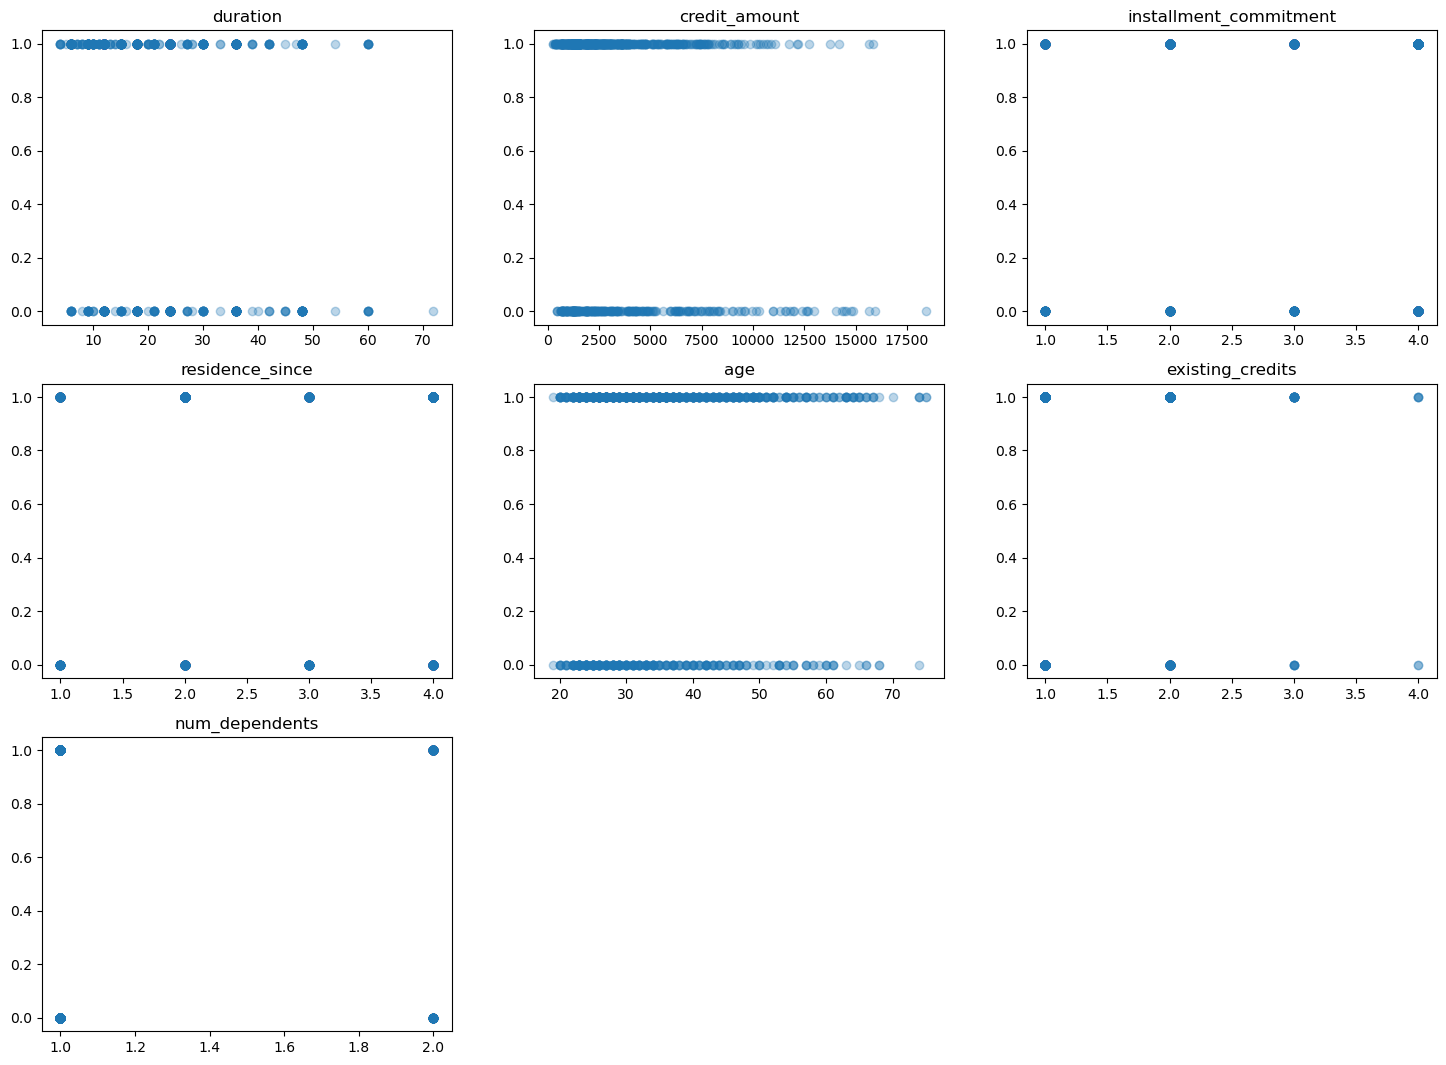

In [25]:
fig,axes=plt.subplots(3,3,figsize=(18,13))

for i,ax in enumerate(axes.ravel()):
    if (i>len(numerical)-1):
        ax.set_visible(False)
        continue
    ax.set_title(numerical[i])
    X_col=X_num.iloc[:,i]
    ax.scatter(X_col,y,alpha=.3)

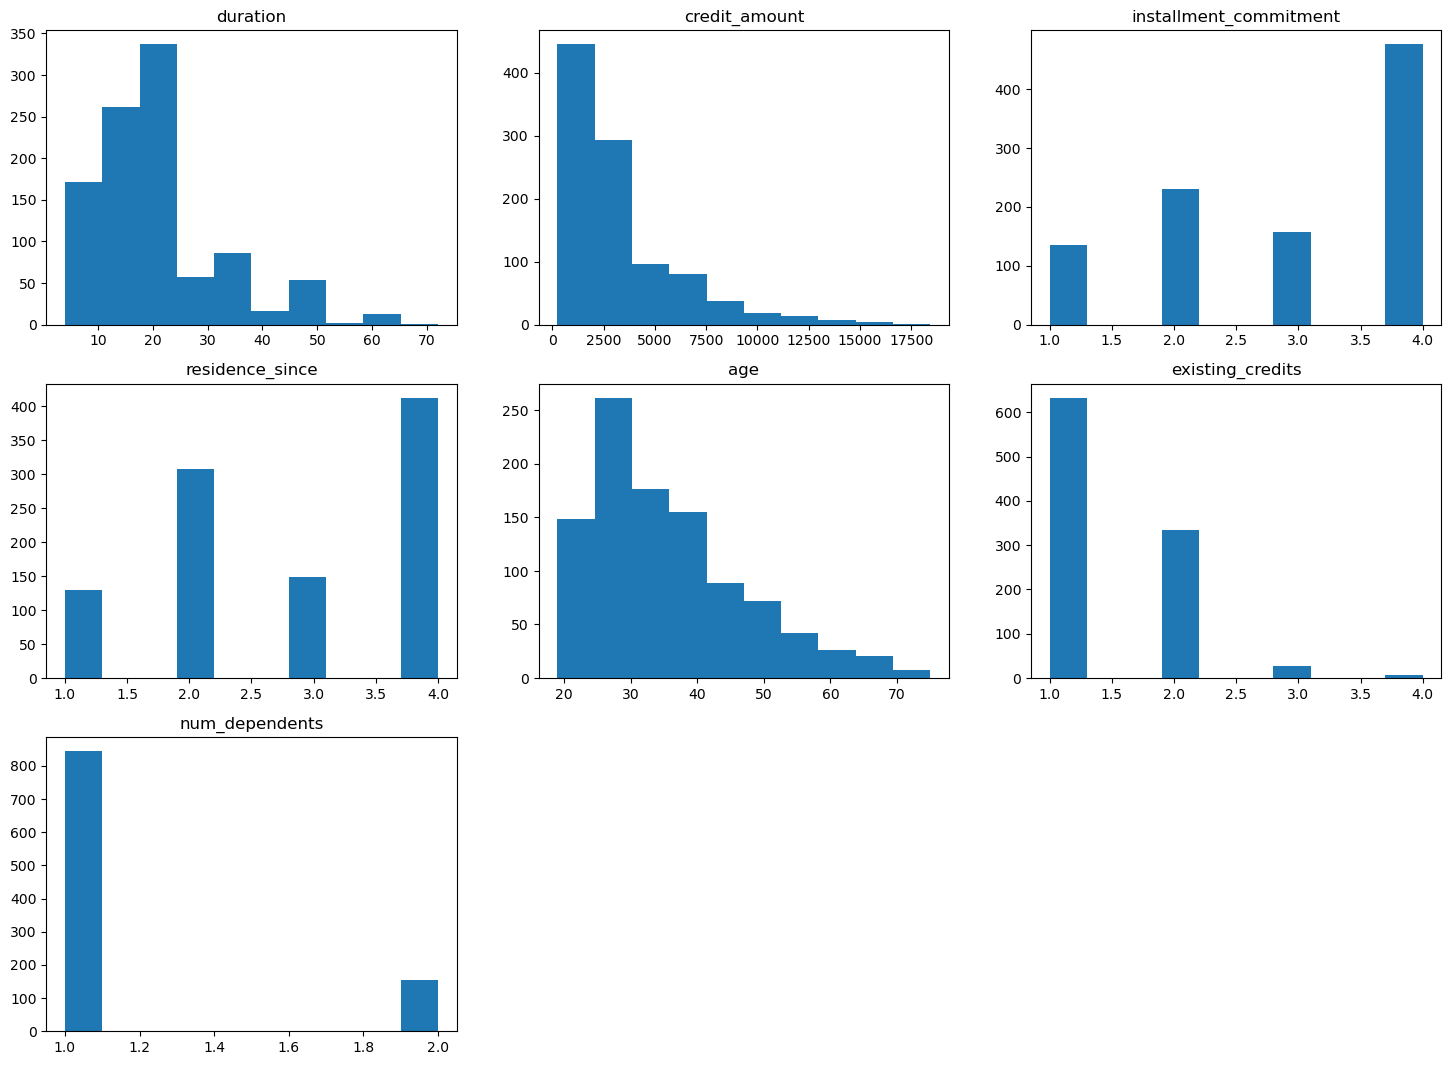

In [26]:
fig,axes=plt.subplots(3,3,figsize=(18,13))

for i,ax in enumerate(axes.ravel()):
    if (i>len(numerical)-1):
        ax.set_visible(False)
        continue
    ax.set_title(numerical[i])
    X_col=X_num.iloc[:,i]
    ax.hist(X_col)

Handling outlier

(array([  7.,  80.,  56., 216.,  74., 153., 241.,  92.,  65.,  16.]),
 array([1.38629436, 1.67533154, 1.96436871, 2.25340589, 2.54244306,
        2.83148024, 3.12051742, 3.40955459, 3.69859177, 3.98762894,
        4.27666612]),
 <BarContainer object of 10 artists>)

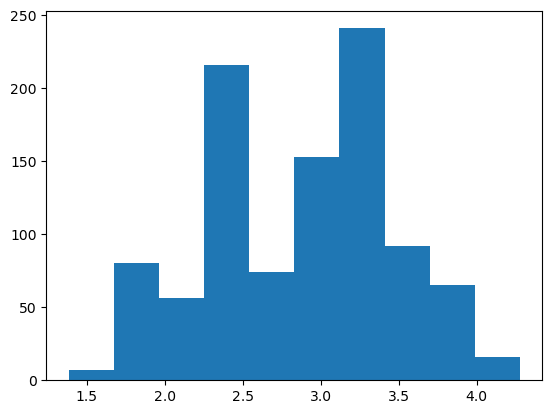

In [27]:
x_log_duration=np.log(X.duration)
plt.hist(x_log_duration)

(array([  7.,  16.,  69., 175., 198., 194., 155., 109.,  55.,  22.]),
 array([5.52146092, 5.95145577, 6.38145062, 6.81144547, 7.24144033,
        7.67143518, 8.10143003, 8.53142488, 8.96141974, 9.39141459,
        9.82140944]),
 <BarContainer object of 10 artists>)

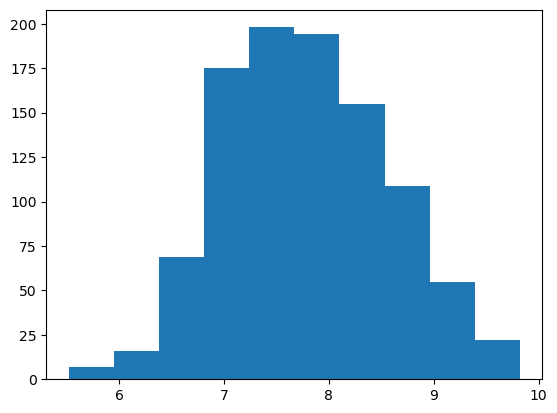

In [28]:
x_log_creditamount=np.log(X.credit_amount)
plt.hist(x_log_creditamount)

In [30]:
X['duration']=x_log_duration
X["credit_amount"]=x_log_creditamount


In [31]:
y.value_counts()

class
1    700
0    300
Name: count, dtype: int64

In [ ]:
import seaborn as sns

<Axes: >

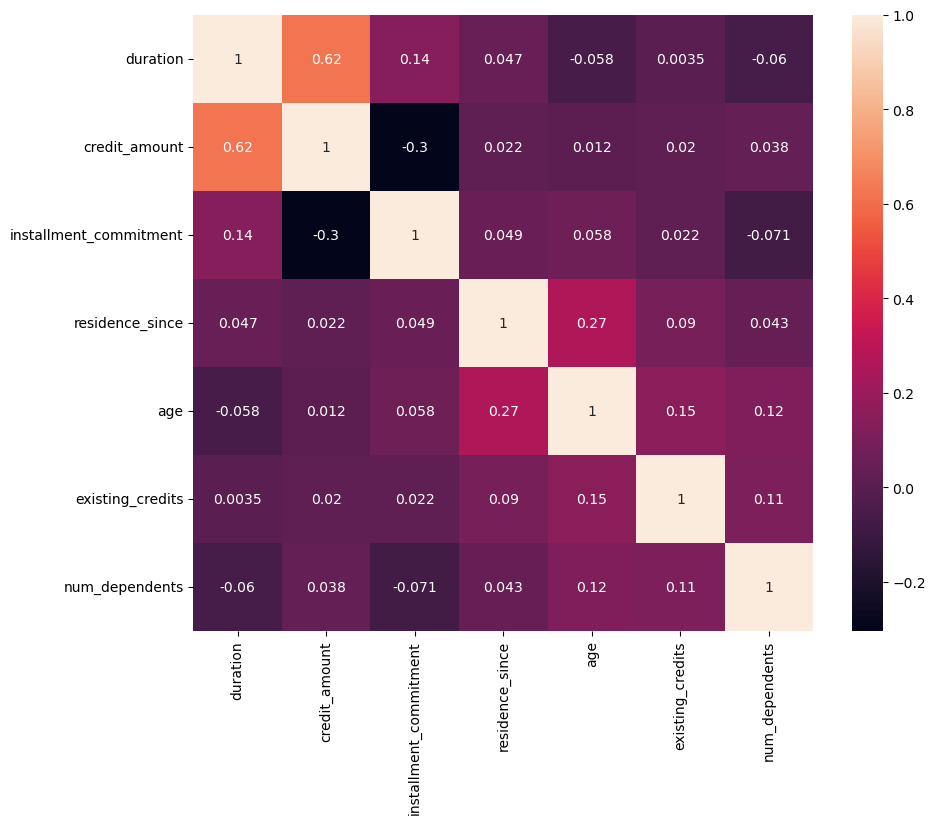

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(numeric_only=True),annot=True)

preprocessing without using help of coulmntransfers and pipelines

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,stratify=y)


In [ ]:
scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train[numerical])
X_test_scaled=scale.transform(X_test[numerical])


In [ ]:
for i in categorical:
    print(df[i].value_counts())

checking_status
b'no checking'    394
b'<0'             274
b'0<=X<200'       269
b'>=200'           63
Name: count, dtype: int64
credit_history
b'existing paid'                     530
b'critical/other existing credit'    293
b'delayed previously'                 88
b'all paid'                           49
b'no credits/all paid'                40
Name: count, dtype: int64
purpose
b'radio/tv'               280
b'new car'                234
b'furniture/equipment'    181
b'used car'               103
b'business'                97
b'education'               50
b'repairs'                 22
b'domestic appliance'      12
b'other'                   12
b'retraining'               9
Name: count, dtype: int64
savings_status
b'<100'                603
b'no known savings'    183
b'100<=X<500'          103
b'500<=X<1000'          63
b'>=1000'               48
Name: count, dtype: int64
employment
b'1<=X<4'        339
b'>=7'           253
b'4<=X<7'        174
b'<1'            172
b'unemployed'     6

In [ ]:
X_dummied=pd.get_dummies(X_train[categorical])

In [ ]:
X1=np.hstack((X_train_scaled, X_dummied))
X2=pd.get_dummies(X_train)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
print(np.mean(cross_val_score(LogisticRegression(),X1,y_train,cv=10)))
# print(np.mean(cross_val_score(LogisticRegression(n),X2,y_train,cv=10)))



0.7426666666666666


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
transfer=ColumnTransformer(transformers=[
                                         ('num',StandardScaler(),numerical),
                                         ('cat',OneHotEncoder(),categorical)
                                         ])
transfer2=ColumnTransformer(transformers=[
                                         ('cat',OneHotEncoder(),categorical)
                                         ])

In [ ]:
transfer

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['duration', 'credit_amount',
                                  'installment_commitment', 'residence_since',
                                  'age', 'existing_credits',
                                  'num_dependents']),
                                ('cat', OneHotEncoder(),
                                 ['checking_status', 'credit_history',
                                  'purpose', 'savings_status', 'employment',
                                  'personal_status', 'other_parties',
                                  'property_magnitude', 'other_payment_plans',
                                  'housing', 'job', 'own_telephone',
                                  'foreign_worker'])])

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
pipe1=make_pipeline(transfer,LogisticRegression())
pipe2=make_pipeline(transfer2,LogisticRegression())

print(f"score with scaling {np.mean(cross_val_score(pipe1,X_train,y_train,cv=10))}")
print(f"score without scaling {np.mean(cross_val_score(pipe2,X_train,y_train,cv=10))}")



score with scaling 0.74
score without scaling 0.7466666666666668


In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
pipe3=make_pipeline(transfer,LinearSVC())
pipe4=make_pipeline(transfer2,LinearSVC())

print(f"score with scaling {np.mean(cross_val_score(pipe3,X_train,y_train,cv=10))}")
print(f"score without scaling {np.mean(cross_val_score(pipe4,X_train,y_train,cv=10))}")

score with scaling 0.744
score without scaling 0.7493333333333334


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
pipe5=make_pipeline(transfer,KNeighborsClassifier())
pipe6=make_pipeline(transfer2,KNeighborsClassifier())

print(f"score with scaling {np.mean(cross_val_score(pipe5,X_train,y_train,cv=10))}")
print(f"score without scaling {np.mean(cross_val_score(pipe6,X_train,y_train,cv=10))}")

score with scaling 0.732
score without scaling 0.6986666666666668


In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
pipe7=make_pipeline(transfer,RandomForestClassifier(random_state=0))
pipe8=make_pipeline(transfer2,RandomForestClassifier())

print(f"score with scaling {np.mean(cross_val_score(pipe7,X_train,y_train,cv=10))}")
print(f"score without scaling {np.mean(cross_val_score(pipe8,X_train,y_train,cv=10))}")

score with scaling 0.7506666666666666
score without scaling 0.7413333333333334


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param1_grid={"logisticregression__C":np.logspace(-4, 4, 20)}
grid=GridSearchCV(pipe1,param_grid=param1_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)
grid.best_estimator_


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['duration', 'credit_amount',
                                                   'installment_commitment',
                                                   'residence_since', 'age',
                                                   'existing_credits',
                                                   'num_dependents']),
                                                 ('cat', OneHotEncoder(),
                                                  ['checking_status',
                                                   'credit_history', 'purpose',
                                                   'savings_status',
                                                   'employment',
                                                   'personal_status',
                                                   'other_parties',
                                                   'property_magnitude',
                                                   'other_payment_plans',
                                                   'housing', 'job',
                                                   'own_telephone',
                                                   'foreign_worker'])])),
                ('logisticregression', LogisticRegression(C=10000.0))])

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
y_test_pred=grid.predict(X_test)
print(grid.best_params_)
# print(grid.score)
print(classification_report(y_test,y_test_pred))
print(accuracy_score(y_test,y_test_pred))

{'logisticregression__C': 10000.0}
              precision    recall  f1-score   support

           0       0.70      0.44      0.54        75
           1       0.79      0.92      0.85       175

    accuracy                           0.78       250
   macro avg       0.75      0.68      0.70       250
weighted avg       0.77      0.78      0.76       250

0.776


In [ ]:
from sklearn.model_selection import KFold,StratifiedKFold,ShuffleSplit


In [ ]:
kf=KFold(n_splits=10)
skf=StratifiedKFold(n_splits=10)
ss=ShuffleSplit(n_splits=15,random_state=0)

In [ ]:
grid=GridSearchCV(pipe1,param_grid=param1_grid,cv=skf,scoring='accuracy')
grid.fit(X_train,y_train)
y_test_pred=grid.predict(X_test)
print(grid.best_params_)
print(classification_report(y_test,y_test_pred))
print(accuracy_score(y_test,y_test_pred))

{'logisticregression__C': 545.5594781168514}
              precision    recall  f1-score   support

           0       0.70      0.44      0.54        75
           1       0.79      0.92      0.85       175

    accuracy                           0.78       250
   macro avg       0.75      0.68      0.70       250
weighted avg       0.77      0.78      0.76       250

0.776


In [ ]:
grid=GridSearchCV(pipe1,param_grid=param1_grid,cv=ss,scoring='accuracy')
grid.fit(X_train,y_train)
y_test_pred=grid.predict(X_test)
print(grid.best_params_)
print(classification_report(y_test,y_test_pred))
print(accuracy_score(y_test,y_test_pred))

c:\Users\Mohamed Mosaad\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logisticregression__C': 0.23357214690901212}
              precision    recall  f1-score   support

           0       0.72      0.37      0.49        75
           1       0.78      0.94      0.85       175

    accuracy                           0.77       250
   macro avg       0.75      0.66      0.67       250
weighted avg       0.76      0.77      0.74       250

0.768
